### Principal Component Analysis

A matemática de Principal Component Analysis (PCA) é um tanto complexa para ser explicada de maneira simples, pois requer conhecimento de Algebra Linear e Cadeias de Markov.
<br><br>

Aqui vamos tentar explicar na forma geométrica. Lembre-se na regressão linear, depois de predizer a reta com menor erro quadrático, obtinhamos os resíduos. Caso os resíduos se aproximassem-se de uma distribuição normal, a soma dos erros tenderia a zero.

Em PCA fazemos, de certa maneira a mesma coisa, fazemos a mesma coisa. A reta verde grande, abaixo, é um regessão na direção de maior variãncia. Após encontrá-la, há resíduos, e podemos fazer uma regessão na direção ortogonal, a reta em verde de menor tamanho.

Caso tenhamos n dimensões, fazemos regressões, ou melhor acamos vetores no espaço na maior dispersão, e assim por diante até a menor dispersão, caso haja. Este vetores são todos ortonormais (perpendicurlares) e na Algebra Linear acompanha um auto-valor. Ou seja, para n dimensões temos n autovetores e n autovalores.


![PCA](../figure/pca.png)

Cada vetor pode ser escrito como:
    
$y_i = a_{i1} * x_1  +  a_{i2} * x_2 + .. a_{in} * x_n$
<br><br>
como se observa, o autovetor y_i é linear, e é uma combinação linear de todos os eixo x1, x2 .. até xn

caso os 3 primeiros autovetores, p.ex., perfizerem a soma de 92% de toda a dispersão dos valores neste espaço amostral de n dimensões, podemos aproximar um regressor com 3 autovetores, dispensando n-3 autovetores. A isto denominamos "redução de dimensionalidade".

Espera-se que um PCA atinja mais de 90% de dispersão total com 2 ou 3 variávies, neste caso podemos ver os grupos no espaço 2D ou 3D.

Vamos ver na prática como isto funciona, não se esquecendo que o PCA é totalmente linear e capaz de fazer redução de dimensionalidade, ou seja, clusterizar grupos com muito menos de n autovetores, também chamados de Principais Componentes.

In [1]:
import os, sys
import pandas as pd # pandas e seu alias pd
import numpy as np  # numpy  e seu alias np

from   scipy import stats

from sklearn.decomposition import PCA

sys.path.insert(1, '../libs/')
from stat_lib import *

import seaborn as sns

import matplotlib.pyplot as plt # matplotlib e seu alias plt
%matplotlib inline

### Abrindo a tabela de Iris de Fisher & Anderson
  - vamos pegar as 4 colunas de dados 
  - e ver como o PCA clusteriza
  - ou seja, um PCA é linear, e não precisa de labels, logo é uma técnica de clusterização **NÃO SUPERVISIONADA**

In [2]:
fname = "../data/Iris.csv"
if os.path.exists(fname):
    df = pd.read_csv(fname)
else:
    print("Impossível abrir '%s'"%(fname))
    raise('Error')
    
print(df.shape)
df.columns = ['id', 'sepal_len', 'sepal_width', 'petal_len', 'petal_width', 'species']

df.head(3)

(150, 6)


,id,sepal_len,sepal_width,petal_len,petal_width,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [3]:
data  = df[ ['sepal_len', 'sepal_width', 'petal_len', 'petal_width']]

pca = PCA()
fit = pca.fit_transform(data)

In [4]:
df.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
species = df.species.to_list()
colors = ['red', 'blue', 'green']
specColors = ['red']*50 + ['blue']*50 + ['green']*50

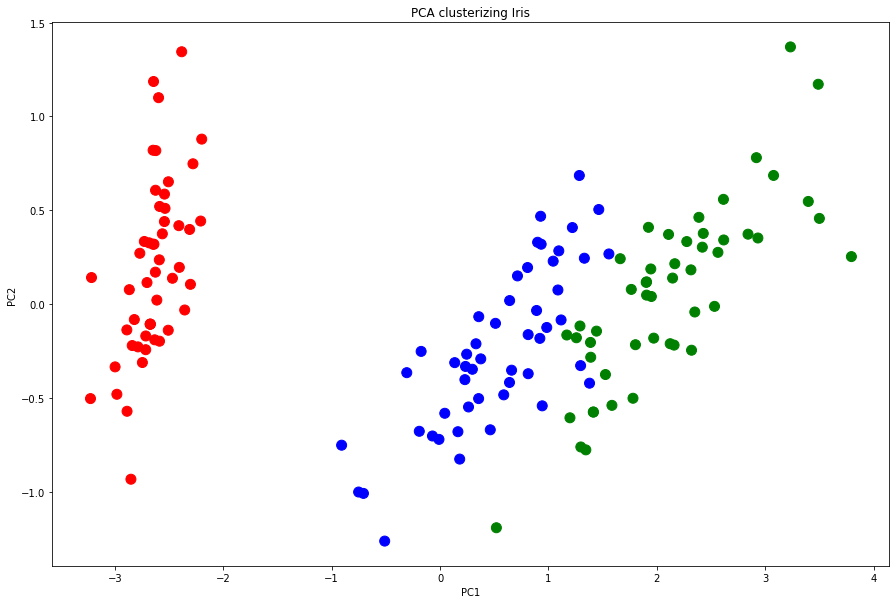

In [6]:
%matplotlib inline
import matplotlib.patches as mpatches
# fig = plt.figure(figsize=(10,10))

fig, ax = plt.subplots(figsize=(15,10))
plt.scatter(fit[:,0], fit[:,1], s=100, c=specColors, alpha=1)

# patches = [ mpatches.Patch(color=specColors[i], label=species[i]) for i in range(len(specColors)) ]

plt.ylabel("PC2")
plt.xlabel("PC1")
plt.title("PCA clusterizing Iris");
# plt.legend(handles=patches, loc="lower right");

### Cálculo de acuracidade

In [7]:
soma = 0; vals = []; count = 0
for val in pca.explained_variance_ratio_:
    soma += val
    vals.append(soma)
    count += 1
    print('PCA%d, variance explanation = %.3f, total var.exp = %.3f'%(count, val, soma) )

PCA1, variance explanation = 0.925, total var.exp = 0.925
PCA2, variance explanation = 0.053, total var.exp = 0.978
PCA3, variance explanation = 0.017, total var.exp = 0.995
PCA4, variance explanation = 0.005, total var.exp = 1.000


In [11]:
df.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### 3D

<IPython.core.display.Javascript object>


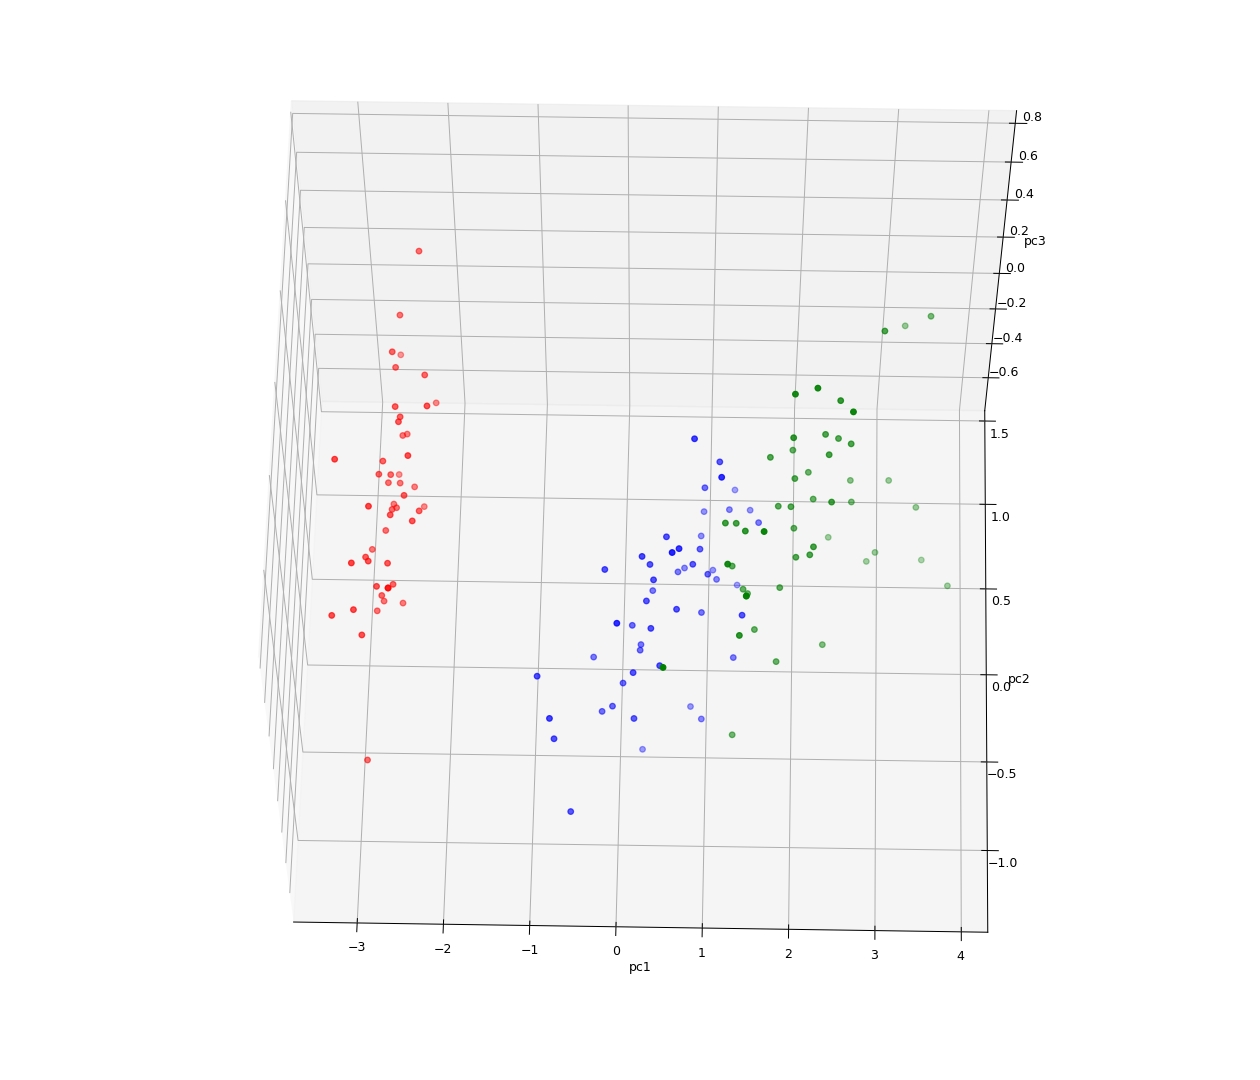

In [10]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

fig = plt.figure(figsize=(14,12))
ax = Axes3D(fig)

# PCA 3 first components
varx = fit[:,0]
vary = fit[:,1]
varz = fit[:,2]

ax.scatter( varx, vary, varz, c=specColors)

ax.set_xlabel("pc1")
ax.set_ylabel("pc2")
ax.set_zlabel("pc3");